In [14]:
import torch.optim as optim
from ray import tune
from ray.tune import track
from ray.tune.schedulers import ASHAScheduler
from ray.tune.examples.mnist_pytorch import get_data_loaders, ConvNet, train, test
import pickle

def train_mnist(config):
    train_loader, test_loader = get_data_loaders()
    model = ConvNet()
    optimizer = optim.SGD(model.parameters(), lr=config["lr"])
    for i in range(10):
        train(model, optimizer, train_loader)
        acc = test(model, test_loader)
        tune.track.log(mean_accuracy=acc)

search_space={"lr": tune.grid_search([0.001, 0.01, 0.1]),
    "momentum": tune.grid_search([0.9, 0.1, 0.3])}

analysis = tune.run(
    train_mnist, 
    config=search_space,
    #resources_per_trial={"cpu": 2, "gpu": 0.05}
)

print("Best config: ", analysis.get_best_config(metric="mean_accuracy"))

dfs = analysis.trial_dataframes
pickle.dump(dfs, open("tune_results.p", "wb"), pickle.HIGHEST_PROTOCOL)


#tensorboard --logdir ~/ray_results

2019-11-12 23:48:26,163	INFO function_runner.py:254 -- tune.track signature detected.


== Status ==
Using FIFO scheduling algorithm.
Resources requested: 0/12 CPUs, 0/0 GPUs, 0.0/3.91 GiB heap, 0.0/1.32 GiB objects
Memory usage on this node: 9.4/16.0 GiB

== Status ==
Using FIFO scheduling algorithm.
Resources requested: 6/12 CPUs, 0/0 GPUs, 0.0/3.91 GiB heap, 0.0/1.32 GiB objects
Memory usage on this node: 9.5/16.0 GiB
Result logdir: /Users/aydarakhmetzyanov/ray_results/train_mnist
Number of trials: 9 ({'RUNNING': 1, 'PENDING': 8})
PENDING trials:
 - train_mnist_1_lr=0.01,momentum=0.9:	PENDING
 - train_mnist_2_lr=0.1,momentum=0.9:	PENDING
 - train_mnist_3_lr=0.001,momentum=0.1:	PENDING
 - train_mnist_4_lr=0.01,momentum=0.1:	PENDING
 - train_mnist_5_lr=0.1,momentum=0.1:	PENDING
 - train_mnist_6_lr=0.001,momentum=0.3:	PENDING
 - train_mnist_7_lr=0.01,momentum=0.3:	PENDING
 - train_mnist_8_lr=0.1,momentum=0.3:	PENDING
RUNNING trials:
 - train_mnist_0_lr=0.001,momentum=0.9:	RUNNING

Result for train_mnist_0_lr=0.001,momentum=0.9:
  date: 2019-11-12_23-48-26
  done: false
  

2019-11-12 23:48:37,174	INFO tune.py:276 -- Returning an analysis object by default. You can call `analysis.trials` to retrieve a list of trials. This message will be removed in future versions of Tune.


== Status ==
Using FIFO scheduling algorithm.
Resources requested: 0/12 CPUs, 0/0 GPUs, 0.0/3.91 GiB heap, 0.0/1.32 GiB objects
Memory usage on this node: 9.7/16.0 GiB
Result logdir: /Users/aydarakhmetzyanov/ray_results/train_mnist
Number of trials: 9 ({'TERMINATED': 9})
TERMINATED trials:
 - train_mnist_0_lr=0.001,momentum=0.9:	TERMINATED, [6 CPUs, 0 GPUs], [pid=29344], 1 s, 9 iter, 0.172 acc
 - train_mnist_1_lr=0.01,momentum=0.9:	TERMINATED, [6 CPUs, 0 GPUs], [pid=29347], 2 s, 9 iter, 0.653 acc
 - train_mnist_2_lr=0.1,momentum=0.9:	TERMINATED, [6 CPUs, 0 GPUs], [pid=29346], 1 s, 9 iter, 0.809 acc
 - train_mnist_3_lr=0.001,momentum=0.1:	TERMINATED, [6 CPUs, 0 GPUs], [pid=29345], 1 s, 9 iter, 0.159 acc
 - train_mnist_4_lr=0.01,momentum=0.1:	TERMINATED, [6 CPUs, 0 GPUs], [pid=29343], 2 s, 9 iter, 0.416 acc
 - train_mnist_5_lr=0.1,momentum=0.1:	TERMINATED, [6 CPUs, 0 GPUs], [pid=29342], 2 s, 9 iter, 0.869 acc
 - train_mnist_6_lr=0.001,momentum=0.3:	TERMINATED, [6 CPUs, 0 GPUs], [pid=2933

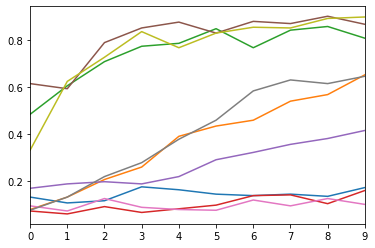

In [15]:
dfs=pickle.load(open("tune_results.p", "rb"))
ax = None  # This plots everything on the same plot
for d in dfs.values():
    ax = d.mean_accuracy.plot(ax=ax, legend=False)
    
#tensorboard --logdir ~/ray_results

In [3]:
df.head()

,mean_accuracy,trial_id,training_iteration,time_this_iter_s,done,timesteps_total,episodes_total,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,config/lr,logdir
0,0.087500,0a868318,9,0.187356,False,NaN,NaN,4e629c9f11b3484481a0339c86d0649d,2019-11-12_23-07-30,1573589250,2.081303,28841,Aydars-MacBook-Pro.local,192.168.0.11,2.081303,0,10,0.001,/Users/aydarakhmetzyanov/ray_results/train_mni...
1,0.571875,0a88c1d2,9,0.182374,False,NaN,NaN,8ee758be58134cceabb6dd03fa0c7ff5,2019-11-12_23-07-30,1573589250,1.987112,28844,Aydars-MacBook-Pro.local,192.168.0.11,1.987112,0,10,0.010,/Users/aydarakhmetzyanov/ray_results/train_mni...
2,0.890625,0a88f3f0,9,0.181191,False,NaN,NaN,199b3e848cad4ba79b07530609e8b89a,2019-11-12_23-07-30,1573589250,2.009627,28845,Aydars-MacBook-Pro.local,192.168.0.11,2.009627,0,10,0.100,/Users/aydarakhmetzyanov/ray_results/train_mni...


In [ ]:
# import ray
# from ray.tune import register_trainable, grid_search, run_experiments
# ray.shutdown()
# def my_func(config, reporter):
#     import time, numpy as np
#     i = 0
#     while True:
#         reporter(timesteps_total=i, mean_accuracy=i ** config["alpha"])
#         i += config["beta"]
#         time.sleep(.01)

# register_trainable("my_func", my_func)

# ray.init(num_cpus=4)
# run_experiments({
#     "my_experiment": {
#         "run": "my_func",
#         "stop": { "mean_accuracy": 100 },
#         "config": {
#             "alpha": grid_search([0.2, 0.4]),
#             "beta": grid_search([1, 2]),
#         },
#     }
# })